In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics
# from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
orig_df = pd.read_csv("./Data/avpat_avtum.csv", sep = "^", index_col = 0)
orig_df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,NaN,C50,Malignant,Stage 2,G2,71,L1201,NaN,NaN,NaN,Curative,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,NaN,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,NaN,C50,Malignant,Stage 4,G3,86,L0401,NaN,NaN,NaN,Non curative,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,NaN,C50,Malignant,NaN,G1,71,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,NaN,C50,Malignant,Stage 3,G2,87,L0801,NaN,NaN,NaN,Curative,1.0,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [4]:
orig_df.shape

(108230, 83)

In [5]:
orig_df['VITALSTATUSDATE'] = pd.to_datetime(orig_df['VITALSTATUSDATE'])
orig_df['DIAGNOSISDATEBEST'] = pd.to_datetime(orig_df['DIAGNOSISDATEBEST'])
orig_df['CANCER_TIME'] = orig_df['VITALSTATUSDATE'] - orig_df['DIAGNOSISDATEBEST']
orig_df['CANCER_DAYS'] = orig_df['CANCER_TIME'] / np.timedelta64(1, 'D')
orig_df['CANCER_MONTHS'] = orig_df['CANCER_TIME'] / np.timedelta64(1, 'M')
orig_df['CANCER_YEARS'] = orig_df['CANCER_TIME'] / np.timedelta64(1, 'Y')
orig_df[['VITALSTATUSDATE', 'DIAGNOSISDATEBEST', 'CANCER_DAYS', 'CANCER_MONTHS', 'CANCER_YEARS']].head()

,VITALSTATUSDATE,DIAGNOSISDATEBEST,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS
624,2017-01-16,2013-09-08,1226.0,40.280088,3.356674
650,2017-01-16,2015-11-11,432.0,14.193310,1.182776
913,2017-01-16,2015-10-24,450.0,14.784698,1.232058
1543,2017-01-16,2014-09-23,846.0,27.795232,2.316269
1613,2017-01-17,2015-03-15,674.0,22.144192,1.845349


In [6]:
orig_df['CANCER_YEARS'].describe()

count    108230.000000
mean          2.511931
std           0.876701
min           0.000000
25%           1.749523
50%           2.518874
75%           3.269061
max           4.043889
Name: CANCER_YEARS, dtype: float64

In [7]:
orig_df[['NEWVITALSTATUS','VITALSTATUSDATE', 'DIAGNOSISDATEBEST', 'CANCER_DAYS', 'CANCER_MONTHS', 'CANCER_YEARS']].sort_values(by='CANCER_DAYS').head(10)

,NEWVITALSTATUS,VITALSTATUSDATE,DIAGNOSISDATEBEST,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS
877058,D,2014-12-12,2014-12-12,0.0,0.000000,0.000000
877209,D,2015-12-31,2015-12-31,0.0,0.000000,0.000000
877811,D,2015-11-25,2015-11-24,1.0,0.032855,0.002738
877103,D,2014-08-09,2014-08-08,1.0,0.032855,0.002738
876784,D,2015-12-10,2015-12-09,1.0,0.032855,0.002738
877637,D,2013-03-09,2013-03-07,2.0,0.065710,0.005476
876905,D,2015-10-17,2015-10-15,2.0,0.065710,0.005476
877436,D,2013-05-24,2013-05-21,3.0,0.098565,0.008214
876949,D,2013-11-16,2013-11-13,3.0,0.098565,0.008214
876861,D,2015-11-06,2015-11-03,3.0,0.098565,0.008214


In [8]:
dead = orig_df[orig_df['NEWVITALSTATUS'] == 'D']
dead.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_TIME,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS
875247,10038511,F,810038511,White British,D,2015-06-22,10338349,2015-05-13,NaN,C50,Malignant,Stage 2,G1,73,L0801,NaN,NaN,NaN,Curative,NaN,NaN,2015-06-11,R,2,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,73.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,40 days,40.0,1.314195,0.109516
875368,10061769,M,810061769,NaN,D,2016-02-05,10339871,2015-10-01,NaN,C50,Malignant,Stage 3,NaN,92,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,2,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,92.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,127 days,127.0,4.172570,0.347714
875532,10093511,F,810093511,NaN,D,2016-03-04,10342049,2015-06-30,NaN,C50,Malignant,Stage 4,G2,83,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-30,L,5 - most deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,83.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,248 days,248.0,8.148011,0.679001
876448,10278105,F,810278105,White British,D,2015-08-20,10354573,2015-04-13,NaN,C50,Malignant,Stage 2,G1,67,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-13,R,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,67.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,129 days,129.0,4.238280,0.353190
876723,20000254,F,820000254,White British,D,2015-10-04,20000254,2014-01-16,C504,C50,Malignant,Stage 3,G2,48,L0301,Positive,Positive,Negative,Curative,NaN,NaN,2014-07-09,R,4,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,48.0,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,626 days,626.0,20.567157,1.713930


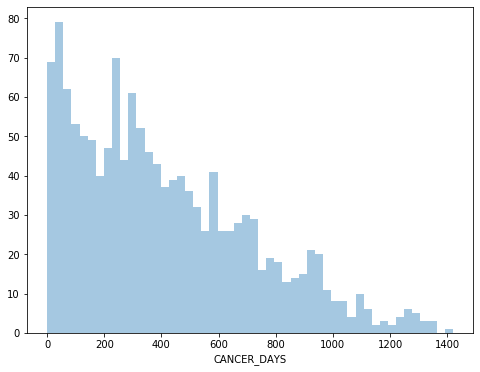

In [9]:
ax = sns.distplot(dead['CANCER_DAYS'], hist = True, kde = False, bins = 50)
plt.gcf().set_size_inches(8,6)

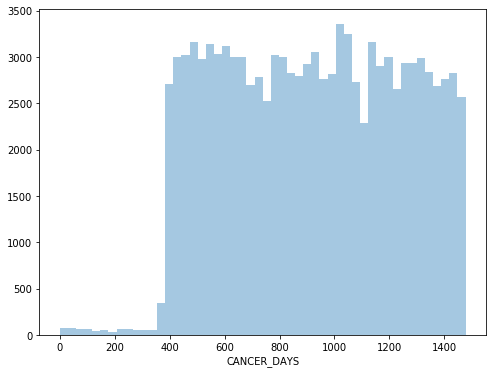

In [10]:
ax = sns.distplot(orig_df['CANCER_DAYS'], hist = True, kde = False, bins = 50)
plt.gcf().set_size_inches(8,6)

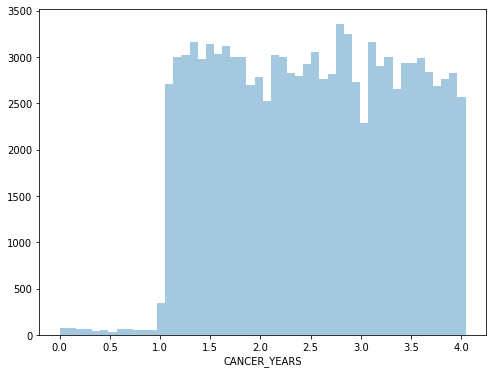

In [11]:
ax = sns.distplot(orig_df['CANCER_YEARS'], hist = True, kde = False, bins = 50)
plt.gcf().set_size_inches(8,6)

In [12]:
orig_df['CANCER_DAYS_MEAN'] = orig_df.groupby('PATIENTID')['CANCER_DAYS'].transform(np.mean)
orig_df['CANCER_MONTHS_MEAN'] = orig_df.groupby('PATIENTID')['CANCER_MONTHS'].transform(np.mean)
orig_df['CANCER_YEARS_MEAN'] = orig_df.groupby('PATIENTID')['CANCER_YEARS'].transform(np.mean)
orig_df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_TIME,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,NaN,C50,Malignant,Stage 2,G2,71,L1201,NaN,NaN,NaN,Curative,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226 days,1226.0,40.280088,3.356674,1226.0,40.280088,3.356674
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,NaN,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432 days,432.0,14.193310,1.182776,432.0,14.193310,1.182776
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,NaN,C50,Malignant,Stage 4,G3,86,L0401,NaN,NaN,NaN,Non curative,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450 days,450.0,14.784698,1.232058,450.0,14.784698,1.232058
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,NaN,C50,Malignant,NaN,G1,71,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846 days,846.0,27.795232,2.316269,846.0,27.795232,2.316269
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,NaN,C50,Malignant,Stage 3,G2,87,L0801,NaN,NaN,NaN,Curative,1.0,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674 days,674.0,22.144192,1.845349,674.0,22.144192,1.845349


In [13]:
orig_df[orig_df['PATIENTID'] == 20010794]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_TIME,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN
308605,20010794,F,820010794,Other white background,A,2017-01-17,20010794,2014-04-29,C501,C50,Malignant,Stage 1,G2,62,L0901,Positive,Positive,Positive,Curative,NaN,NaN,2014-06-11,L,1 - least deprived,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,62.0,False,False,False,False,False,False,False,True,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,994 days,994.0,32.657755,2.721480,965.666667,31.726866,2.643906
308606,20010794,F,820010794,Other white background,A,2017-01-17,20129134,2014-06-08,C505,C50,Malignant,Stage 1,G2,62,L0901,Positive,NaN,NaN,NaN,NaN,NaN,2014-07-20,R,1 - least deprived,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,62.0,False,False,False,False,False,False,False,True,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,954 days,954.0,31.343559,2.611963,965.666667,31.726866,2.643906
308607,20010794,F,820010794,Other white background,A,2017-01-17,20136414,2014-06-13,NaN,C50,Malignant,NaN,G2,62,L0901,Positive,Positive,NaN,Curative,1.0,1.0,NaN,L,1 - least deprived,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,62.0,False,False,False,False,False,False,False,True,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,949 days,949.0,31.179285,2.598274,965.666667,31.726866,2.643906


In [14]:
orig_df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS',
       'VITALSTATUSDATE', 'TUMOURID', 'DIAGNOSISDATEBEST', 'SITE_ICD10_O2',
       'SITE_ICD10_O2_3CHAR', 'BEHAVIOUR_ICD10_O2', 'STAGE_BEST', 'GRADE',
       'AGE', 'CREG_CODE', 'ER_STATUS', 'PR_STATUS', 'HER2_STATUS',
       'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS', 'ACE27',
       'DATE_FIRST_SURGERY', 'LATERALITY', 'QUINTILE_2015', 'NUMBER_TUMOURS',
       'SC500', 'SC501', 'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508',
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT',
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2',
       'GRADE3', 'GRADE4', 'AGE_MEAN', 'L0801', 'L1001', 'L1701', 'L0201',
       'L0401', 'L1201', 'L0301', 'L0901', 'ER_POS', 'ER_NEG', 'PR_POS',
       'PR_NEG', 'HER_POS', 'HER_NEG', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT',
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2',
       'ACE3', 'LEFT', 'RIGHT', 'M

In [15]:
columns_selected = ['PATIENTID', 'SEX', 'ETHNICITY', 'NEWVITALSTATUS', 'NUMBER_TUMOURS',
       'SC500', 'SC501', 'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508',
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT',
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2',
       'GRADE3', 'GRADE4', 'AGE_MEAN', 'L0801', 'L1001', 'L1701', 'L0201',
       'L0401', 'L1201', 'L0301', 'L0901', 'ER_POS', 'ER_NEG', 'PR_POS',
       'PR_NEG', 'HER_POS', 'HER_NEG', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT',
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2',
       'ACE3', 'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2',
       'DEPR3', 'DEPR4', 'DEPR5', 'CANCER_DAYS_MEAN', 'CANCER_MONTHS_MEAN', 'CANCER_YEARS_MEAN']
df = orig_df[columns_selected]
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN
624,10000724,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674
650,10000752,F,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776
913,10001050,F,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058
1543,10001750,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269
1613,10001824,F,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349


In [16]:
df.shape

(108230, 66)

In [17]:
df = df.drop_duplicates()
df.shape

(105686, 66)

In [18]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') > 1].count()

PATIENTID             0
SEX                   0
ETHNICITY             0
NEWVITALSTATUS        0
NUMBER_TUMOURS        0
SC500                 0
SC501                 0
SC502                 0
SC503                 0
SC504                 0
SC505                 0
SC506                 0
SC508                 0
BEH_BENIGN            0
BEH_MALIG             0
BEH_MICINV            0
BEH_INSITU            0
BEH_UNCERT            0
STAGE0                0
STAGE1                0
STAGE2                0
STAGE3                0
STAGE4                0
GRADE1                0
GRADE2                0
GRADE3                0
GRADE4                0
AGE_MEAN              0
L0801                 0
L1001                 0
L1701                 0
L0201                 0
L0401                 0
L1201                 0
L0301                 0
L0901                 0
ER_POS                0
ER_NEG                0
PR_POS                0
PR_NEG                0
HER_POS               0
HER_NEG         

In [19]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') == 1].count()

PATIENTID             105686
SEX                   105686
ETHNICITY              98768
NEWVITALSTATUS        105686
NUMBER_TUMOURS        105686
SC500                 105686
SC501                 105686
SC502                 105686
SC503                 105686
SC504                 105686
SC505                 105686
SC506                 105686
SC508                 105686
BEH_BENIGN            105686
BEH_MALIG             105686
BEH_MICINV            105686
BEH_INSITU            105686
BEH_UNCERT            105686
STAGE0                105686
STAGE1                105686
STAGE2                105686
STAGE3                105686
STAGE4                105686
GRADE1                105686
GRADE2                105686
GRADE3                105686
GRADE4                105686
AGE_MEAN              105686
L0801                 105686
L1001                 105686
L1701                 105686
L0201                 105686
L0401                 105686
L1201                 105686
L0301         

In [20]:
df.isna().sum()

PATIENTID                0
SEX                      0
ETHNICITY             6918
NEWVITALSTATUS           0
NUMBER_TUMOURS           0
SC500                    0
SC501                    0
SC502                    0
SC503                    0
SC504                    0
SC505                    0
SC506                    0
SC508                    0
BEH_BENIGN               0
BEH_MALIG                0
BEH_MICINV               0
BEH_INSITU               0
BEH_UNCERT               0
STAGE0                   0
STAGE1                   0
STAGE2                   0
STAGE3                   0
STAGE4                   0
GRADE1                   0
GRADE2                   0
GRADE3                   0
GRADE4                   0
AGE_MEAN                 0
L0801                    0
L1001                    0
L1701                    0
L0201                    0
L0401                    0
L1201                    0
L0301                    0
L0901                    0
ER_POS                   0
E

In [21]:
df.dtypes

PATIENTID               int64
SEX                    object
ETHNICITY              object
NEWVITALSTATUS         object
NUMBER_TUMOURS          int64
SC500                    bool
SC501                    bool
SC502                    bool
SC503                    bool
SC504                    bool
SC505                    bool
SC506                    bool
SC508                    bool
BEH_BENIGN               bool
BEH_MALIG                bool
BEH_MICINV               bool
BEH_INSITU               bool
BEH_UNCERT               bool
STAGE0                   bool
STAGE1                   bool
STAGE2                   bool
STAGE3                   bool
STAGE4                   bool
GRADE1                   bool
GRADE2                   bool
GRADE3                   bool
GRADE4                   bool
AGE_MEAN              float64
L0801                    bool
L1001                    bool
L1701                    bool
L0201                    bool
L0401                    bool
L1201     

In [22]:
original_memory = df.memory_usage(deep=True).sum() / 1024**2 
print('Memory used: %.1f GB' % original_memory)

Memory used: 31.5 GB


In [23]:
for col in ['SEX', 'ETHNICITY']:
    df[col] = df[col].astype('category')
    
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN
624,10000724,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674
650,10000752,F,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776
913,10001050,F,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058
1543,10001750,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269
1613,10001824,F,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349


In [24]:
def dead(value):
    if value == 'D':
        return 1
    else:
        return 0

df['DEAD'] = df['NEWVITALSTATUS'].apply(dead)    
df['DEAD'].value_counts()

0    104333
1      1353
Name: DEAD, dtype: int64

In [25]:
df = df.drop(['NEWVITALSTATUS'], axis = 1)
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,DEAD
624,10000724,M,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,0
650,10000752,F,White British,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,0
913,10001050,F,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,0
1543,10001750,M,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,0
1613,10001824,F,Other ethnic group,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,0


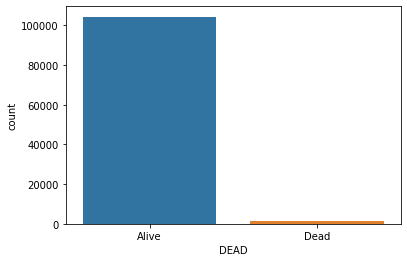

In [26]:
ax = sns.countplot(data = df, x = 'DEAD')
ax.set_xticklabels(['Alive', 'Dead'])
plt.show()

In [27]:
percentage_alive = np.mean(df['DEAD'] == 0) * 100
percentage_dead = np.mean(df['DEAD'] == 1) * 100
print("Percentage of patients classified as alive: %.2f" % percentage_alive)
print("Percentage of patients classified as dead: %.2f" % percentage_dead)

Percentage of patients classified as alive: 98.72
Percentage of patients classified as dead: 1.28


In [28]:
df.dtypes

PATIENTID                int64
SEX                   category
ETHNICITY             category
NUMBER_TUMOURS           int64
SC500                     bool
SC501                     bool
SC502                     bool
SC503                     bool
SC504                     bool
SC505                     bool
SC506                     bool
SC508                     bool
BEH_BENIGN                bool
BEH_MALIG                 bool
BEH_MICINV                bool
BEH_INSITU                bool
BEH_UNCERT                bool
STAGE0                    bool
STAGE1                    bool
STAGE2                    bool
STAGE3                    bool
STAGE4                    bool
GRADE1                    bool
GRADE2                    bool
GRADE3                    bool
GRADE4                    bool
AGE_MEAN               float64
L0801                     bool
L1001                     bool
L1701                     bool
L0201                     bool
L0401                     bool
L1201   

In [29]:
new_memory = df.memory_usage(deep = True).sum() / 1024 ** 2 
print('Memory used: %.1f GB' % new_memory)

Memory used: 17.4 GB


In [30]:
df.columns

Index(['PATIENTID', 'SEX', 'ETHNICITY', 'NUMBER_TUMOURS', 'SC500', 'SC501',
       'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508', 'BEH_BENIGN',
       'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 'STAGE0',
       'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3',
       'GRADE4', 'AGE_MEAN', 'L0801', 'L1001', 'L1701', 'L0201', 'L0401',
       'L1201', 'L0301', 'L0901', 'ER_POS', 'ER_NEG', 'PR_POS', 'PR_NEG',
       'HER_POS', 'HER_NEG', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT', 'ECOG0',
       'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2', 'ACE3',
       'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2', 'DEPR3',
       'DEPR4', 'DEPR5', 'CANCER_DAYS_MEAN', 'CANCER_MONTHS_MEAN',
       'CANCER_YEARS_MEAN', 'DEAD'],
      dtype='object')

In [31]:
df = pd.concat([df[['PATIENTID', 'DEAD', 'NUMBER_TUMOURS',
       'SC500', 'SC501', 'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508',
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT',
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2',
       'GRADE3', 'GRADE4', 'AGE_MEAN', 'L0801', 'L1001', 'L1701', 'L0201',
       'L0401', 'L1201', 'L0301', 'L0901', 'ER_POS', 'ER_NEG', 'PR_POS',
       'PR_NEG', 'HER_POS', 'HER_NEG', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT',
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2',
       'ACE3', 'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2',
       'DEPR3', 'DEPR4', 'DEPR5', 'CANCER_DAYS_MEAN', 'CANCER_MONTHS_MEAN',
       'CANCER_YEARS_MEAN']],                      
        pd.get_dummies(df['SEX'], prefix='SEX'),                      
        pd.get_dummies(df['ETHNICITY'], prefix='ETHNICITY'),
        ], axis=1)
df.head()

,PATIENTID,DEAD,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,SEX_F,SEX_M,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
624,10000724,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
650,10000752,0,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
913,10001050,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1543,10001750,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1613,10001824,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
df.isna().sum()

PATIENTID                                  0
DEAD                                       0
NUMBER_TUMOURS                             0
SC500                                      0
SC501                                      0
SC502                                      0
SC503                                      0
SC504                                      0
SC505                                      0
SC506                                      0
SC508                                      0
BEH_BENIGN                                 0
BEH_MALIG                                  0
BEH_MICINV                                 0
BEH_INSITU                                 0
BEH_UNCERT                                 0
STAGE0                                     0
STAGE1                                     0
STAGE2                                     0
STAGE3                                     0
STAGE4                                     0
GRADE1                                     0
GRADE2    

In [33]:
# df[(df['CANCER_YEARS_MEAN'] < 1)].count()

In [34]:
# df1 = df[(df['CANCER_YEARS_MEAN'] >= 1) & (df['CANCER_YEARS_MEAN'] < 2)]
# df1.count()

In [35]:
# df2 = df[(df['CANCER_YEARS_MEAN'] >= 2) & (df['CANCER_YEARS_MEAN'] < 3)]
# df2.count()

In [36]:
# df3 = df[(df['CANCER_YEARS_MEAN'] >= 3) & (df['CANCER_YEARS_MEAN'] < 4)]
# df3.count()

In [37]:
# df4 = df[(df['CANCER_YEARS_MEAN'] >= 4)]
# df4.count()

In [38]:
df.columns

Index(['PATIENTID', 'DEAD', 'NUMBER_TUMOURS', 'SC500', 'SC501', 'SC502',
       'SC503', 'SC504', 'SC505', 'SC506', 'SC508', 'BEH_BENIGN', 'BEH_MALIG',
       'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 'STAGE0', 'STAGE1', 'STAGE2',
       'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEAN',
       'L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901',
       'ER_POS', 'ER_NEG', 'PR_POS', 'PR_NEG', 'HER_POS', 'HER_NEG',
       'CURATIVE', 'NONCURATIVE', 'NOACTTREAT', 'ECOG0', 'ECOG1', 'ECOG2',
       'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2', 'ACE3', 'LEFT', 'RIGHT',
       'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5',
       'CANCER_DAYS_MEAN', 'CANCER_MONTHS_MEAN', 'CANCER_YEARS_MEAN', 'SEX_F',
       'SEX_M', 'ETHNICITY_Asian Bangladeshi', 'ETHNICITY_Asian Indian',
       'ETHNICITY_Asian Pakistani', 'ETHNICITY_Black African',
       'ETHNICITY_Black Caribbean', 'ETHNICITY_Chinese',
       'ETHNICITY_Mixed white and Asian',
   

In [39]:
X = df[['NUMBER_TUMOURS', 'SC500', 'SC501',
       'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508', 'BEH_BENIGN',
       'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 'STAGE0',
       'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3',
       'GRADE4', 'AGE_MEAN', 'L0801', 'L1001', 'L1701', 'L0201', 'L0401',
       'L1201', 'L0301', 'L0901', 'ER_POS', 'ER_NEG', 'PR_POS', 'PR_NEG',
       'HER_POS', 'HER_NEG', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT', 'ECOG0',
       'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2', 'ACE3',
       'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2', 'DEPR3',
       'DEPR4', 'DEPR5', 'CANCER_YEARS_MEAN',
       'SEX_F', 'SEX_M', 'ETHNICITY_Asian Bangladeshi',
       'ETHNICITY_Asian Indian', 'ETHNICITY_Asian Pakistani',
       'ETHNICITY_Black African', 'ETHNICITY_Black Caribbean',
       'ETHNICITY_Chinese', 'ETHNICITY_Mixed white and Asian',
       'ETHNICITY_Mixed white and black African', 'ETHNICITY_Other',
       'ETHNICITY_Other Asian background', 'ETHNICITY_Other black background',
       'ETHNICITY_Other ethnic group', 'ETHNICITY_Other mixed background',
       'ETHNICITY_Other white background', 'ETHNICITY_White',
       'ETHNICITY_White British', 'ETHNICITY_White Irish',
       'ETHNICITY_White and black Caribbean']]

In [40]:
y = df['DEAD']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [42]:
y_train.value_counts()

0    93906
1     1211
Name: DEAD, dtype: int64

In [43]:
y_test.value_counts()

0    10427
1      142
Name: DEAD, dtype: int64

In [44]:
logr = LogisticRegression(class_weight = 'balanced')
logr.fit(X_train,y_train)

/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
accuracy_logr = cross_val_score(logr, X_train, y_train, cv = 10, scoring = "accuracy").mean()
recall_logr = cross_val_score(logr, X_train, y_train, cv = 10, scoring = "recall").mean()
precision_logr = cross_val_score(logr, X_train, y_train, cv = 10, scoring = "precision").mean()
roc_auc_logr = cross_val_score(logr, X_train, y_train, cv = 10, scoring = "roc_auc").mean()
print('Accuracy: %.3f' % accuracy_logr)
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('ROC_AUC: %.3f' % roc_auc_logr)

/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.835
Recall: 0.799
Precision: 0.059
ROC_AUC: 0.904


In [46]:
y_predicted = logr.predict(X_test)

In [47]:
logr_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(logr_confusion_matrix)

[[ 108   34]
 [1703 8724]]


In [48]:
true_positives, false_negatives, false_positives, true_negatives = logr_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 108
True negatives: 8724
False positives: 1703
False negatives: 34


In [49]:
def plot_confusion_matrix(logr_confusion_matrix, target_names=['Alive', 'Dead'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(logr_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

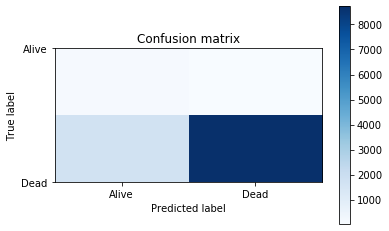

In [50]:
_ = plot_confusion_matrix(logr_confusion_matrix)

In [51]:
logr_confusion_matrix_normalized = logr_confusion_matrix / logr_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
print(logr_confusion_matrix_normalized)

[[0.76056338 0.23943662]
 [0.16332598 0.83667402]]


In [52]:
true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = logr_confusion_matrix_normalized.ravel()
print('True positives rate: %.2f' % (true_positives_rate * 100))
print('True negatives rate: %.2f' % (true_negatives_rate * 100))
print('False positives rate: %.2f' % (false_positives_rate * 100))
print('False negatives rate: %.2f' % (false_negatives_rate * 100))

True positives rate: 76.06
True negatives rate: 83.67
False positives rate: 16.33
False negatives rate: 23.94


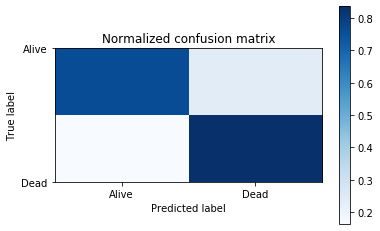

In [53]:
_ = plot_confusion_matrix(logr_confusion_matrix_normalized, title="Normalized confusion matrix")

In [54]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       1.00      0.84      0.91     10427
        Dead       0.06      0.76      0.11       142

    accuracy                           0.84     10569
   macro avg       0.53      0.80      0.51     10569
weighted avg       0.98      0.84      0.90     10569



In [55]:
y_predicted_proba_logr = logr.predict_proba(X_test)

In [56]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted_proba_logr[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('Receiver Operating Characteristic')    
    ax.legend(loc="lower right")    
    return fig, ax

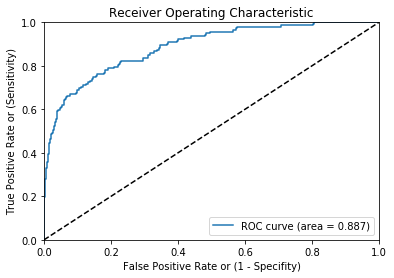

In [57]:
_ = plot_roc_curve(y_test, y_predicted_proba_logr)

In [58]:
clfTree = DecisionTreeClassifier(class_weight = 'balanced')

In [59]:
# clfTree = GridSearchCV(DecisionTreeClassifier(),
#                       param_grid = {"max_depth":np.arange(2,10),
#                                    "min_samples_leaf": np.arange(10,30)},
#                       cv=5,
#                        scoring="accuracy"
#                       )

In [60]:
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [61]:
accuracy_clfTree = cross_val_score(clfTree, X_train, y_train, cv = 10, scoring = "accuracy").mean()
recall_clfTree = cross_val_score(clfTree, X_train, y_train, cv = 10, scoring = "recall").mean()
precision_clfTree = cross_val_score(clfTree, X_train, y_train, cv = 10, scoring = "precision").mean()
roc_auc_clfTree = cross_val_score(clfTree, X_train, y_train, cv = 10, scoring = "roc_auc").mean()
print('Accuracy: %.3f' % accuracy_clfTree)
print('Recall: %.3f' % recall_clfTree)
print('Precision: %.3f' % precision_clfTree)
print('ROC_AUC: %.3f' % roc_auc_clfTree)

Accuracy: 0.987
Recall: 0.544
Precision: 0.491
ROC_AUC: 0.770


In [62]:
y_predicted = clfTree.predict(X_test)

In [63]:
clfTree_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfTree_confusion_matrix)

[[   65    77]
 [   87 10340]]


In [64]:
true_positives, false_negatives, false_positives, true_negatives = clfTree_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 65
True negatives: 10340
False positives: 87
False negatives: 77


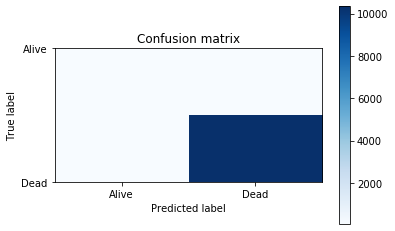

In [65]:
_ = plot_confusion_matrix(clfTree_confusion_matrix)

In [66]:
clfTree_confusion_matrix_normalized = clfTree_confusion_matrix / clfTree_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
print(clfTree_confusion_matrix_normalized)

[[0.45774648 0.54225352]
 [0.00834372 0.99165628]]


In [67]:
true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = clfTree_confusion_matrix_normalized.ravel()
print('True positives: %.2f' % (true_positives_rate * 100))
print('True negatives: %.2f' % (true_negatives_rate * 100))
print('False positives: %.2f' % (false_positives_rate * 100))
print('False negatives: %.2f' % (false_negatives_rate * 100))

True positives: 45.77
True negatives: 99.17
False positives: 0.83
False negatives: 54.23


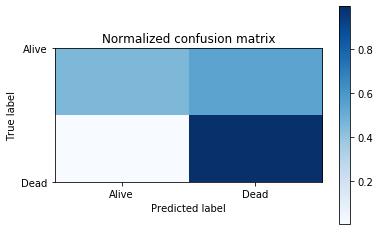

In [68]:
_ = plot_confusion_matrix(clfTree_confusion_matrix_normalized, title="Normalized confusion matrix")

In [69]:
y_predicted_proba_clfTree = clfTree.predict_proba(X_test)

In [70]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted_proba_clfTree[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('Receiver Operating Characteristic')    
    ax.legend(loc="lower right")    
    return fig, ax

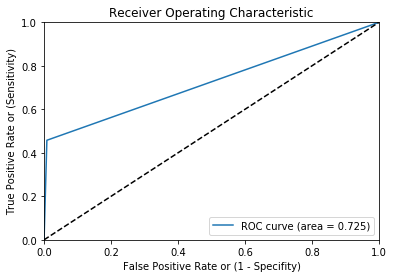

In [71]:
_ = plot_roc_curve(y_test, y_predicted_proba_clfTree)

In [72]:
clfRF = RandomForestClassifier(n_estimators = 50, class_weight = 'balanced')

In [73]:
clfRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [74]:
accuracy_RF = cross_val_score(clfRF, X_train, y_train, cv = 10, scoring = "accuracy").mean()
recall_RF = cross_val_score(clfRF, X_train, y_train, cv = 10, scoring = "recall").mean()
precision_RF = cross_val_score(clfRF, X_train, y_train, cv = 10, scoring = "precision").mean()
roc_auc_RF = cross_val_score(clfRF, X_train, y_train, cv = 10, scoring = "roc_auc").mean()
print('Accuracy: %.3f' % accuracy_RF)
print('Recall: %.3f' % recall_RF)
print('Precision: %.3f' % precision_RF)
print('ROC_AUC: %.3f' % roc_auc_RF)

Accuracy: 0.994
Recall: 0.507
Precision: 0.985
ROC_AUC: 0.848


In [75]:
y_predicted = clfRF.predict(X_test)

In [76]:
clfRF_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfRF_confusion_matrix)

[[   61    81]
 [    0 10427]]


In [77]:
true_positives, false_negatives, false_positives, true_negatives = clfRF_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 61
True negatives: 10427
False positives: 0
False negatives: 81


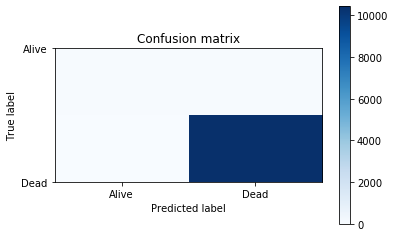

In [78]:
_ = plot_confusion_matrix(clfRF_confusion_matrix)

In [79]:
clfRF_confusion_matrix_normalized = clfRF_confusion_matrix / clfRF_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
print(clfRF_confusion_matrix_normalized)

[[0.42957746 0.57042254]
 [0.         1.        ]]


In [80]:
true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = clfRF_confusion_matrix_normalized.ravel()
print('True positives: %.2f' % (true_positives_rate * 100))
print('True negatives: %.2f' % (true_negatives_rate * 100))
print('False positives: %.2f' % (false_positives_rate * 100))
print('False negatives: %.2f' % (false_negatives_rate * 100))

True positives: 42.96
True negatives: 100.00
False positives: 0.00
False negatives: 57.04


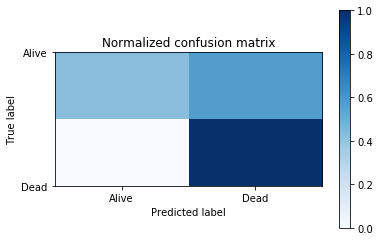

In [81]:
_ = plot_confusion_matrix(clfRF_confusion_matrix_normalized, title="Normalized confusion matrix")

In [82]:
y_predicted_proba_clfRF = clfRF.predict_proba(X_test)

In [83]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted_proba_clfRF[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('Receiver Operating Characteristic')    
    ax.legend(loc="lower right")    
    return fig, ax

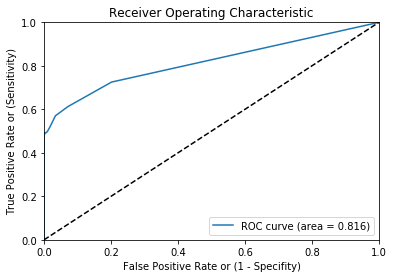

In [84]:
_ = plot_roc_curve(y_test, y_predicted_proba_clfRF)

In [87]:
clfGB = GradientBoostingClassifier(n_estimators = 50)

In [88]:
clfGB.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:
accuracy_GB = cross_val_score(clfGB, X_train, y_train, cv = 10, scoring = "accuracy").mean()
recall_GB = cross_val_score(clfGB, X_train, y_train, cv = 10, scoring = "recall").mean()
precision_GB = cross_val_score(clfGB, X_train, y_train, cv = 10, scoring = "precision").mean()
roc_auc_GB = cross_val_score(clfGB, X_train, y_train, cv = 10, scoring = "roc_auc").mean()
print('Accuracy: %.3f' % accuracy_GB)
print('Recall: %.3f' % recall_GB)
print('Precision: %.3f' % precision_GB)
print('ROC_AUC: %.3f' % roc_auc_GB)

Accuracy: 0.994
Recall: 0.540
Precision: 0.970
ROC_AUC: 0.915


In [90]:
y_predicted = clfGB.predict(X_test)

In [91]:
clfGB_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfGB_confusion_matrix)

[[   67    75]
 [    4 10423]]


In [92]:
true_positives, false_negatives, false_positives, true_negatives = clfGB_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 67
True negatives: 10423
False positives: 4
False negatives: 75


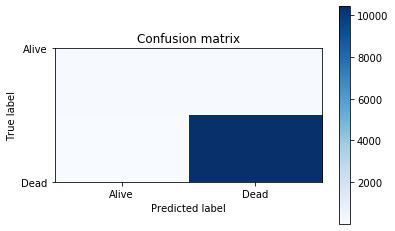

In [93]:
_ = plot_confusion_matrix(clfGB_confusion_matrix)

In [94]:
clfGB_confusion_matrix_normalized = clfGB_confusion_matrix / clfGB_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
print(clfGB_confusion_matrix_normalized)

[[4.71830986e-01 5.28169014e-01]
 [3.83619450e-04 9.99616381e-01]]


In [95]:
true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = clfGB_confusion_matrix_normalized.ravel()
print('True positives: %.2f' % (true_positives_rate * 100))
print('True negatives: %.2f' % (true_negatives_rate * 100))
print('False positives: %.2f' % (false_positives_rate * 100))
print('False negatives: %.2f' % (false_negatives_rate * 100))

True positives: 47.18
True negatives: 99.96
False positives: 0.04
False negatives: 52.82


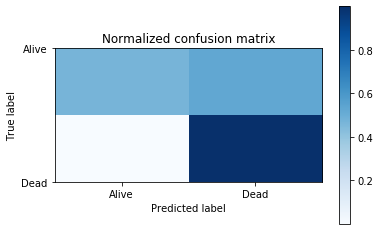

In [96]:
_ = plot_confusion_matrix(clfGB_confusion_matrix_normalized, title="Normalized confusion matrix")

In [97]:
y_predicted_proba_clfGB = clfGB.predict_proba(X_test)

In [98]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted_proba_clfGB[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('Receiver Operating Characteristic')    
    ax.legend(loc="lower right")    
    return fig, ax

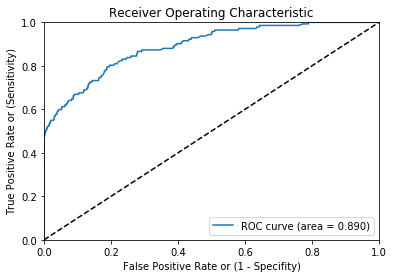

In [99]:
_ = plot_roc_curve(y_test, y_predicted_proba_clfGB)